[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Unfettered-b/Asgard_Protein_annotation/blob/main/search_cds.ipynb)

# 🔍 CDS Search and Mapping Notebook

This notebook allows you to:
- Search for coding sequences (CDS) by ID or keyword based on asCOGs database  
- Retrieve corresponding protein sequences and headers  

📁 **Repository:** [Asgard_Protein_annotation](https://github.com/Unfettered-b/Asgard_Protein_annotation)


In [3]:
# ============================================
# 🔧 Setup + Interactive CDS Search Tool in Colab
# ============================================

print("🔧 Setting up... please wait a few seconds for the CDS Search Tool to load 👇")

# --- Clone and prepare repo ---
!apt-get -qq install git-lfs
!git clone https://github.com/Unfettered-b/Asgard_Protein_annotation.git
%cd Asgard_Protein_annotation
!git lfs install
!git lfs pull
!ls -lh data/


import pandas as pd
from IPython.display import display, HTML

# --- 🔧 Search parameters ---
completeness = "50"  # @param ["50"]

# --- Load the database ---
cds_file = f"data/Proteins_genomes_cp{completeness}.csv"
try:
    cds_db = pd.read_csv(cds_file)
except FileNotFoundError:
    raise FileNotFoundError(f"❌ File not found: {cds_file}\nMake sure this file exists in the 'data/' folder.")

# Move 'sequence' column to the end for cleaner display
cds_db = cds_db[[c for c in cds_db.columns if c != 'sequence'] + ['sequence']]
cds_db['header'] = cds_db['header'].str.split().str[1:].str.join(" ").str.strip()


print(f"✅ Loaded database with {len(cds_db)} entries.")
print(f"🧬 Unique species in database: {cds_db['organism_name'].nunique()}")


🔧 Setting up... please wait a few seconds for the CDS Search Tool to load 👇
Cloning into 'Asgard_Protein_annotation'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 178 (delta 78), reused 132 (delta 36), pack-reused 0 (from 0)
Receiving objects: 100% (178/178), 64.56 KiB | 1.57 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Filtering content: 100% (21/21), 1.03 GiB | 24.28 MiB/s, done.
/content/Asgard_Protein_annotation/Asgard_Protein_annotation/Asgard_Protein_annotation
Updated git hooks.
Git LFS initialized.
total 1.1G
-rw-r--r-- 1 root root  92M Nov 10 12:27 all_query_ids.txt
-rw-r--r-- 1 root root  400 Nov 10 12:27 asgard_clustering_summary.tsv
-rw-r--r-- 1 root root  29M Nov 10 12:27 assigned_ids.txt
-rw-r--r-- 1 root root 249K Nov 10 12:27 Filtered_genomes50.csv
-rw-r--r-- 1 root root 349K Nov 10 12:27 Filtered_genomes50_names.csv
-rw-r--r-- 1 root root 226K Nov 10 12:2

/tmp/ipython-input-4260621040.py:25: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  cds_db = pd.read_csv(cds_file)


✅ Loaded database with 2360884 entries.
🧬 Unique species in database: 67


🔎 Found 1 results for header search: 'ftsz' (filtered by organism: 'umbra')



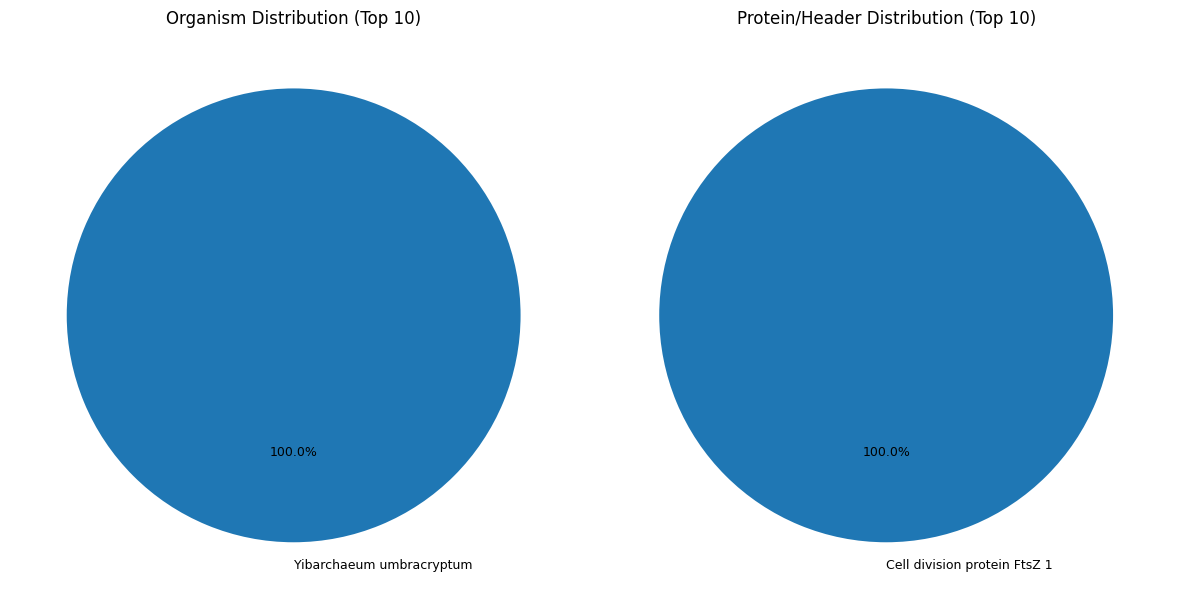

Unnamed: 0,organism_name,breed,strain,cds_id,header,genome_file,sequence
434885,Yibarchaeum umbracryptum,updated recently,updated recently,EEBCKCME_02010,Cell division protein FtsZ 1,GCA_002505645.1_ASM250564v1,MDEHYIINIDEEEDNVSNRNEPNTFDSDDMDKELEKLLVNKSGSSDRFSSSSVDSYIQQVLKTNRILAIGVGGAGSNAINNIVTRGGIIGATAVAVNTDARHLLSTQAERKLLLGRELTNGTGAGNDPNIGRAAAEENEEDMRELVRGNDLVFVACGLGKGTGTGAAPYIAKIAQDEGCLVVSVCTLPFASEGQSKMDAALQGLDELNEHSNTIIVVPNEKLLMYAPDFTLWDAFKLADDVLINAVVGLTELIVLPARVNVDFADTKKILRRSGPAVIGVGHGKGENRAIQAITNALSNPLLDIDITSSTGALVNIKANKNISMTEVDTITTMITDQINPKAEFVWGCNIDEVIPDDELAVTVVIAEVKSSYLTKTDDISIEALWRD


In [8]:
# ============================================
# 🧬 CDS Search Tool for Asgard Proteins (Colab-ready)
# ============================================

import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# --- 🔧 Search parameters ---
search_term = "ftsz"  # @param {type:"string"}
organism_filter = "umbra "      # @param {type:"string"}

# --- Primary search logic ---
term = search_term.strip()
org = organism_filter.strip()

if not term and not org:
    print("⚠️ Please enter at least a search term or an organism filter.")
else:
    results = cds_db.copy()

    if term:
        results = results[results['header'].str.contains(term, case=False, na=False)]

    if org:
        results = results[results['organism_name'].str.contains(org, case=False, na=False)]

    results = results[~results['header'].str.contains('hypothetical protein', case=False, na=False)]
    # --- Results summary ---
    print(f"🔎 Found {len(results)} results", end="")
    if term:
        print(f" for header search: '{term}'", end="")
    if org:
        print(f" (filtered by organism: '{org}')", end="")
    print("\n")

    # --- Visualization ---
    if len(results) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # 1️⃣ Organism distribution pie chart
        org_counts = results['organism_name'].value_counts().head(10)
        axes[0].pie(
            org_counts.values,
            labels=org_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            textprops={'fontsize': 9}
        )
        axes[0].set_title("Organism Distribution (Top 10)", fontsize=12)

        # 2️⃣ Header (protein type) distribution pie chart
        header_counts = results['header'].value_counts().head(10)
        axes[1].pie(
            header_counts.values,
            labels=header_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            textprops={'fontsize': 9}
        )
        axes[1].set_title("Protein/Header Distribution (Top 10)", fontsize=12)

        plt.tight_layout()
        plt.show()

        # --- Display results table ---
        display(HTML(results.to_html(index=False)))
    else:
        print("No matches found.")

# --- Optional clean table styling ---
HTML("""
<style>
table {border-collapse: collapse; width:100%;}
th, td {padding: 6px 10px; text-align: left; border-bottom: 1px solid #ddd;}
tr:hover {background-color: #f5f5f5;}
</style>
""")
